In [854]:
""" Project Goals:
Q1) Which month is best for selling products?
Q2) What time of the day do people order the most goods online?
Q3) Which product has the highest demand and why?
"""

' Project Goals:\nQ1) Which month is best for selling products?\nQ2) What time of the day do people order the most goods online?\nQ3) Which product has the highest demand and why?\n'

In [855]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [856]:
 df = pd.read_excel('/Users/mac/Desktop/BLOOMTECH/Online_Sales_Project/Online Retail.xlsx')

In [857]:
 df.to_csv('Online Retail.csv', index = None, header = True)

In [858]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [859]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [860]:
df.shape

(541909, 8)

In [861]:
nan_cols = df[df.isna().any(axis=1)]
print(nan_cols)

       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  Unit

In [862]:
df = df.dropna()

In [863]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [864]:
df.shape

(406829, 8)

In [865]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [866]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [867]:
"""Build Month Column"""

df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

In [868]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12


In [869]:
df["Month"].nunique()

12

In [870]:
df["Month"].value_counts()

11    65598
10    50695
12    44511
9     40822
5     28908
6     27836
3     27822
8     27662
7     27502
4     23198
1     21912
2     20363
Name: Month, dtype: int64

In [871]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month                   int64
dtype: object

In [872]:
"""Build Sales Column"""

df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [873]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [874]:
"""Initial Amount of Sales per Month View"""

df.groupby('Month')['Sales'].sum()

Month
1      475074.380
2      436546.150
3      579964.610
4      426047.851
5      648251.080
6      608013.160
7      574238.481
8      616368.000
9      931440.372
10     974603.590
11    1132407.740
12     897110.400
Name: Sales, dtype: float64

Text(0, 0.5, 'Sales in Millions of Dollars')

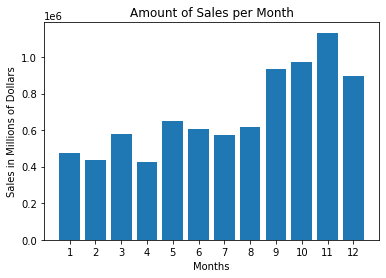

In [875]:
"""Q1: Which month is best for selling products?"""

months = range(1,13)
plt.bar(months,df.groupby('Month')['Sales'].sum())
plt.title("Amount of Sales per Month")
plt.xticks(range(1,13))
plt.xlabel('Months')
plt.ylabel('Sales in Millions of Dollars')

In [876]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [877]:
df['Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour

In [878]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,8


In [879]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month                   int64
Sales                 float64
Hour                    int64
dtype: object

In [880]:
df["Hour"].value_counts()

12    73342
13    65062
14    55075
11    50249
15    46220
10    38951
16    24997
9     22464
17    13734
8      8792
19     3511
18     3137
20      871
7       383
6        41
Name: Hour, dtype: int64

Text(0, 0.5, 'Amount of Items Sold')

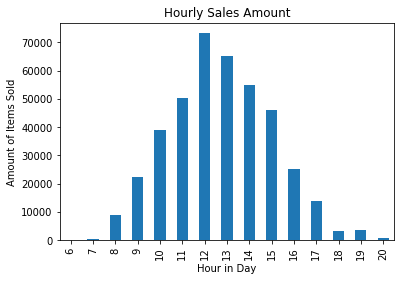

In [881]:
"""Q2: What time of the day do people order the most goods online?"""

hour_plot = df['Hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
hour_plot.set_title("Hourly Sales Amount")
hour_plot.set_xlabel("Hour in Day")
hour_plot.set_ylabel("Amount of Items Sold")

In [882]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Sales,Hour
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,16.60,12
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,12,14.85,12


In [883]:
"""Change Negative Quantities to Zero Quantities"""

df[df['Quantity'] < 0] = 0

In [884]:
"""Sum of Groupby StockCodes & Quantities, Sorted to see top Products Sold """

item = df.groupby('StockCode')['Quantity'].sum().sort_values().tail()
print(item)


StockCode
85099B    46181
22197     49183
84077     54415
23166     77916
23843     80995
Name: Quantity, dtype: int64


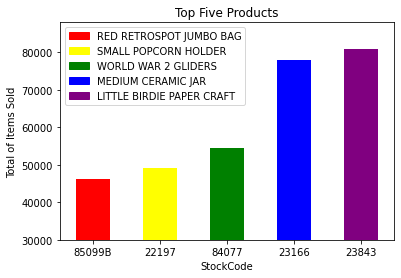

In [885]:
"""Q3) Which product has the highest demand and why?"""

prod_plot = item.plot.bar(
                xlabel='StockCode',
                ylabel='Total of Items Sold',
                title='Top Five Products',
                rot=0, 
                ylim=(30000,88000),
                color=['red','yellow','green','blue','purple'])

red_patch = mpatches.Patch(color='red', label='RED RETROSPOT JUMBO BAG')
yellow_patch = mpatches.Patch(color='yellow', label='SMALL POPCORN HOLDER')
green_patch = mpatches.Patch(color='green', label='WORLD WAR 2 GLIDERS')
blue_patch = mpatches.Patch(color='blue', label='MEDIUM CERAMIC JAR')
purple_patch = mpatches.Patch(color='purple', label='LITTLE BIRDIE PAPER CRAFT')

prod_plot.legend(handles=[red_patch, yellow_patch, green_patch, blue_patch, purple_patch])